# `spaCy`

`spaCy` es una librería de Python utilizada para proyectos de **Procesamiento del Lenguaje Natural** (NLP) poniendo a la disposición del programador varias técnicas utilizadas en un pipeline de NLP:
- Tokenization
- Normalización del texto (eliminar mayúsculas, stemming, lemmatization)
- Part-Of-Speech tagging
- Named Entity Recognition (NER)

Para instalar `spaCy` y dependencias:
```
pip install spacy

pip install es-core-news-sm
```

# Load data

In [1]:
import pandas as pd

In [2]:
df = pd.read_pickle("../../data/preprocessed/stemm_lemm_stop_words.pkl")

In [3]:
df.columns

Index(['Facebook Id', 'Post Created', 'Total Interactions', 'Likes',
       'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care',
       'Message_stpWrd', 'Message_clean_stpWrd', 'Message_clean_stemm_stpWrd',
       'Message_clean_lemm_stpWrd'],
      dtype='object')

En este notebook analizaremos siguientes variables:
- `Message_stpWrd`
- `Message_clean_stpWrd`
- `Message_clean_stemm_stpWrd`
- `Message_clean_lemm_stpWrd`

Específicamente: `Message_clean_lemm_stpWrd`

In [6]:
df[['Message_stpWrd', 'Message_clean_stpWrd', 
    'Message_clean_stemm_stpWrd', 'Message_clean_lemm_stpWrd']].head()

,Message_stpWrd,Message_clean_stpWrd,Message_clean_stemm_stpWrd,Message_clean_lemm_stpWrd
0,Mitigar cambio climático pies tierra. http://r...,mitigar cambio climatico pies tierra,mitig cambi climat pies tierr,mitigar cambio climatico pie tierra
1,#México 🇲🇽 | Ciudad México urbe Latinoamérica ...,mexico ciudad mexico urbe latinoamerica busca ...,mexic ciud mexic urbe latinoamer busc siguient...,mexico ciudad mexico urbe latinoamerica buscar...
2,"2018 comienza deseo corazón hagan disfruten, p...",2018 comienza deseo corazon hagan disfruten ma...,par 2018 comienz dese corazon hag tod disfrut ...,2018 comenzar desear corazon disfrutar mas aun...
3,"ONU lanza alerta roja 2018 armas nucleares, vi...",onu lanza alerta roja 2018 armas nucleares vio...,onu lanz alert roj par 2018 armas nuclear viol...,onu lanzar alerta rojo 2018 arma nuclear viola...
4,Novedoso proyecto busca instalar paneles solar...,novedoso proyecto busca instalar paneles solar...,noved proyect busc instal panel solar lun par ...,novedoso proyecto buscar instalar panel solar ...


In [7]:
df.shape

(87422, 16)

Algunos mensajes (*original*, *limpio*, *stemmatizado* y *lemmatizado*) preprocesados son:

In [8]:
print('ORIGINAL MESSAGE')
for i, text in enumerate(df['Message_stpWrd']):
    print(f"Post {i + 1}: {text}")
    #display(Markdown(f"Post {i + 1}: {text}"))
    if i == 4:
        break
print("\n")

print('CLEAN MESSAGE')
for i, text in enumerate(df['Message_clean_stpWrd']):
    print(f"Post {i + 1}: {text}")
    if i == 4:
        break
print("\n")

print('STEMMED MESSAGE')
for i, text in enumerate(df['Message_clean_stemm_stpWrd']):
    print(f"Post {i + 1}: {text}")
    if i == 4:
        break
print("\n")

print('LEMMATIZED MESSAGE')
for i, text in enumerate(df['Message_clean_lemm_stpWrd']):
    print(f"Post {i + 1}: {text}")
    if i == 4:
        break
print("\n")

ORIGINAL MESSAGE
Post 1: Mitigar cambio climático pies tierra. http://regenerationinternational.org/2017/12/27/agricultura-regenerativa-tierra-cambio-climatico/:=:https://regenerationinternational.org/2017/12/27/agricultura-regenerativa-tierra-cambio-climatico/
Post 2: #México 🇲🇽 | Ciudad México urbe Latinoamérica busca generación mujeres líderes.
Post 3: 2018 comienza deseo corazón hagan disfruten, pero, aún, disfruten hagan. repartan amor lados: seres humanos comunidad seres vivos. terrible calentamiento global serio calentamiento social, violencias, odios, muertes exclusiones, anular densa “amorósfera”: energía amor presente, actuante continua expansión. solidaridad, amor universal haremos presente esperanza 2018. cariño, Victor Quintana
Post 4: ONU lanza alerta roja 2018 armas nucleares, violación DH cambio climático “La unidad camino”, insistió secretario. “Nuestro futuro depende ello”.
Post 5: Novedoso proyecto busca instalar paneles solares luna, abastecer energía planeta Tierra

In [9]:
facebook_post_clean = df['Message_clean_lemm_stpWrd'].values.tolist()
facebook_post_clean[:5]

['mitigar cambio climatico pie tierra',
 'mexico ciudad mexico urbe latinoamerica buscar generacion mujer lider',
 '2018 comenzar desear corazon disfrutar mas aun disfrutar repartir amor humano comunidad vivo terrible calentamiento global aun mas serio calentamiento social violencia odio muerte exclusión anular mas denso amorosfera energia amor presente actuante continuo expansion solidaridad amor universal presente esperanza 2018 carino victor quintana',
 'onu lanzar alerta rojo 2018 arma nuclear violacion dh cambio climatico unidad camino insistio secretario futuro depender',
 'novedoso proyecto buscar instalar panel solar luna abastecer energia planeta tierra']

# Preprocess data: Tokenize by lemmatize text

In [10]:
from tqdm import tqdm

A continuación se van a crear los mensajes tokenizados. En este proyecto un token representa una **palabra**.

In [11]:
%time
tokens_spacy = []
for post in tqdm(facebook_post_clean):
    token_i = [token for token in post.split(' ')]
    tokens_spacy.append(token_i)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 11 µs


100%|██████████| 87422/87422 [00:01<00:00, 47776.29it/s]


Así se ven los post procesados como tokens:

In [12]:
for i in tokens_spacy[:5]:
    print(i)

['mitigar', 'cambio', 'climatico', 'pie', 'tierra']
['mexico', 'ciudad', 'mexico', 'urbe', 'latinoamerica', 'buscar', 'generacion', 'mujer', 'lider']
['2018', 'comenzar', 'desear', 'corazon', 'disfrutar', 'mas', 'aun', 'disfrutar', 'repartir', 'amor', 'humano', 'comunidad', 'vivo', 'terrible', 'calentamiento', 'global', 'aun', 'mas', 'serio', 'calentamiento', 'social', 'violencia', 'odio', 'muerte', 'exclusión', 'anular', 'mas', 'denso', 'amorosfera', 'energia', 'amor', 'presente', 'actuante', 'continuo', 'expansion', 'solidaridad', 'amor', 'universal', 'presente', 'esperanza', '2018', 'carino', 'victor', 'quintana']
['onu', 'lanzar', 'alerta', 'rojo', '2018', 'arma', 'nuclear', 'violacion', 'dh', 'cambio', 'climatico', 'unidad', 'camino', 'insistio', 'secretario', 'futuro', 'depender']
['novedoso', 'proyecto', 'buscar', 'instalar', 'panel', 'solar', 'luna', 'abastecer', 'energia', 'planeta', 'tierra']


In [13]:
print(f"Hay un total de {len(tokens_spacy)} mensajes.")

Hay un total de 87422 mensajes.


# Phrase Modelling (N-gram)

**Phrase Modelling** permite obtener combinaciones de tokens (palabras) que juntos representen conceptos de importancia (multi-palabras). Para ello, analizamos las palabras que aparecen en los posts de **Facebook** con el objetivo de analizar cuáles de ellas co-ocurren más frecuente de lo que podríamos esperar. Utilizamos el término *phrase* (*phrase*) bajo el supuesto de que una *frase* es el resultado de unir dos o más palabras. La fórmula que se utilizan los *phrase models* para construir una *frase* dadas $2$ palabras (tokens) $A$ y $B$ es:

$
\frac{count(AB) - count_{min}}{count(A)*count(B)} * N > threshold 
$

En donde,
- $count(A)$ es el número de veces que aparece el token $A$ en el corpus.
- $count(B)$ es el número de veces que aparece el token $B$ en el corpus.
- $count(AB)$ es el número de veces que co-aparecen los token $AB$ (juntos) en el corpus.
- $N$ es el tamaño del vocabulario del corpus (palabras únicas).
- $count_{min}$ hiperparámetro predefinido que asegura que los tokens (en este caso $AB$) co-ocurran al menos un número de veces.
- $threshold$ hiperparámetro predefinido para controlar la "relevancia" que debe tener la co-ocurrencia de dos tokens para ser aceptada como una *frase*.


Se crearán modelos encargados de calcular **n-gramas** (bigrama y trigrama). Para ello se utilizará versión `1.10.1` de `scipy`. La cual puede ser instalada con la siguiente línea de código:

```
pip install scipy==1.10.1
```

In [14]:
import gensim
from collections import Counter

## Bigrams

Creación del modelo para obtener bigramas (*phrase models*)

In [15]:
#bigram = gensim.models.Phrases(tokens_spacy, min_count=10, threshold=20)
bigram = gensim.models.Phrases(tokens_spacy)#, min_count=10, threshold=20)

Así se ven los textos convirtiendo tokens a *frases* (bigramas):

In [16]:
posts_bigram = bigram[tokens_spacy]
for i in posts_bigram[:10]:
    print(i)

['mitigar', 'cambio_climatico', 'pie', 'tierra']
['mexico', 'ciudad_mexico', 'urbe', 'latinoamerica', 'buscar', 'generacion', 'mujer', 'lider']
['2018', 'comenzar', 'desear', 'corazon', 'disfrutar', 'mas', 'aun', 'disfrutar', 'repartir', 'amor', 'humano', 'comunidad', 'vivo', 'terrible', 'calentamiento_global', 'aun', 'mas', 'serio', 'calentamiento', 'social', 'violencia', 'odio', 'muerte', 'exclusión', 'anular', 'mas', 'denso', 'amorosfera', 'energia', 'amor', 'presente', 'actuante', 'continuo', 'expansion', 'solidaridad', 'amor', 'universal', 'presente', 'esperanza', '2018', 'carino', 'victor', 'quintana']
['onu', 'lanzar', 'alerta_rojo', '2018', 'arma_nuclear', 'violacion', 'dh', 'cambio_climatico', 'unidad', 'camino', 'insistio', 'secretario', 'futuro', 'depender']
['novedoso', 'proyecto', 'buscar', 'instalar_panel', 'solar', 'luna', 'abastecer', 'energia', 'planeta', 'tierra']
['secretario_general', 'onu_antonio', 'guterres', 'lanzar', 'senal_alerta', 'comunidad_internacional', 'a

Ahora, procesemos todos los posts utilizando el modelo `bigram`

In [17]:
tokens_bigram = [item for sublist in tokens_spacy for item in bigram[sublist]]
corpus_post_model_bigram = Counter(tokens_bigram)

El top-20 de bigramas (*phrases*) y tokens con mayor frecuencia es:

In [18]:
for word, count in corpus_post_model_bigram.most_common(20):
    print(f'{word}: {count}')

cambio_climatico: 59805
mas: 24803
ano: 12141
mundo: 9860
climatico: 9196
agua: 8722
calentamiento_global: 8717
tambien: 8387
dia: 7779
pais: 7640
planeta: 7299
proyecto: 6888
asi: 6637
ambiental: 6312
medio_ambiente: 6291
ciudad: 6110
nacional: 6081
gobierno: 5894
desarrollo: 5608
tierra: 5423


Mientras que el Top-$20$ de *bigramas* con mayor frecuencia es:

In [19]:
bigrams = [i for i in tokens_bigram if '_' in i]
corpus_bigrams = Counter(bigrams)

In [20]:
for word, count in corpus_bigrams.most_common(20):
    print(f'{word}: {count}')

cambio_climatico: 59805
calentamiento_global: 8717
medio_ambiente: 6291
acuerdo_paris: 3692
lucha_cambio: 2340
donald_trump: 1911
desarrollo_sostenible: 1703
adaptacion_cambio: 1539
naciones_unidas: 1520
recurso_natural: 1450
mas_informacion: 1196
gas_efecto: 1184
energia_renovable: 1182
combatir_cambio: 1169
dia_mundial: 1168
america_latino: 1153
efecto_invernadero: 1127
costa_rico: 1085
hora_planeta: 1080
gestion_riesgo: 1059


## Trigrams

Para el caso de trigramas, se utilizará el objeto `posts_bigram` que contiene los posts procesados en cuanto a frases y se aplicará un nuevo modelo `trigram`. Nótese que la creación de los posts lleva una **recurrencia** (se utiliza el resultado previo para el cálculo del nuevo).

In [21]:
#trigram = gensim.models.Phrases(posts_bigram, min_count=10, threshold=20)
trigram = gensim.models.Phrases(posts_bigram)

In [22]:
tokens_spacy[:1]

[['mitigar', 'cambio', 'climatico', 'pie', 'tierra']]

In [23]:
tokens_bigram[:1]

['mitigar']

In [24]:
posts_trigram = trigram[posts_bigram]
for i in posts_trigram[:10]:
    print(i)

['mitigar_cambio_climatico', 'pie', 'tierra']
['mexico', 'ciudad_mexico', 'urbe', 'latinoamerica', 'buscar', 'generacion', 'mujer_lider']
['2018', 'comenzar', 'desear', 'corazon', 'disfrutar', 'mas', 'aun', 'disfrutar', 'repartir', 'amor', 'humano', 'comunidad', 'vivo', 'terrible', 'calentamiento_global', 'aun_mas', 'serio', 'calentamiento', 'social', 'violencia', 'odio', 'muerte', 'exclusión', 'anular', 'mas', 'denso', 'amorosfera', 'energia', 'amor', 'presente', 'actuante', 'continuo', 'expansion', 'solidaridad', 'amor', 'universal', 'presente', 'esperanza', '2018', 'carino', 'victor', 'quintana']
['onu', 'lanzar', 'alerta_rojo', '2018', 'arma_nuclear', 'violacion', 'dh', 'cambio_climatico', 'unidad', 'camino', 'insistio', 'secretario', 'futuro', 'depender']
['novedoso', 'proyecto', 'buscar', 'instalar_panel_solar', 'luna', 'abastecer', 'energia', 'planeta', 'tierra']
['secretario_general_onu_antonio', 'guterres', 'lanzar', 'senal_alerta', 'comunidad_internacional', 'agudizacion', 'c

La siguiente línea de código procesa los `posts_bigram` con el objetivo de obtener trigramas relevantes (nuevas *frases*):

In [25]:
tokens_trigram = [item for sublist in posts_bigram for item in trigram[sublist]]
corpus_post_model_trigram = Counter(tokens_trigram)

Obtengamos únicamente los trigramas:

In [26]:
trigrams = [i for i in tokens_trigram if i.count('_') == 2]
corpus_trigrams = Counter(trigrams)

El Top-$20$ de trigramas con mayor frecuencia es:

In [27]:
for word, count in corpus_trigrams.most_common(20):
    print(f'{word}: {count}')

efecto_cambio_climatico: 2097
lucha_cambio_climatico: 2079
frente_cambio_climatico: 1471
adaptacion_cambio_climatico: 1217
combatir_cambio_climatico: 1075
luchar_cambio_climatico: 765
gas_efecto_invernadero: 528
mitigacion_cambio_climatico: 431
frenar_cambio_climatico: 396
cuidado_medio_ambiente: 392
mitigar_cambio_climatico: 362
efecto_calentamiento_global: 339
america_latino_caribe: 299
aumento_nivel_mar: 291
objetivo_desarrollo_sostenible: 288
instituto_nacional_ecologia: 273
proteccion_medio_ambiente: 258
presidente_donald_trump: 246
ministerio_medio_ambiente: 222
programa_naciones_unidas: 214


# Bag-of-words

Una tarea esencial en proyectos de **NLP** es la vectorización del texto.

- ¿Por qué es tan importante?
- ¿A qué me refiero con esto de vectorización del texto?

El avance en ciencia y tecnología, específicamente en computación ha permitido que podemos hacer grandes de cantidades de operaciones en tiempos cada vez menores. El primer uso de la palabra "computadora" data del año $1613$ haciendo referencia a una persona que realizaba cálculos (cómputos)[$^1$](https://www.taurho-transcribes.co.uk/origins-of-the-computer/). 

Como su nombre lo dice, las computadoras realizan cómputos y ¡para eso las utilizaremos! Para poder realizar estos cómputos necesitan números, vectores, matrices, tensores. Los cuals no tenemos al momento, sin embargo, !existen técnicas que se encargan de convertir el texto a números! 

> "We can't overstimate the value of computers, yes they are great for playing games and forwarding funny emails..." - Michael Scott[$^2$](https://www.youtube.com/watch?v=eTkw9WOzhDs)
> <iframe src="https://giphy.com/embed/jOpLbiGmHR9S0" width="480" height="266" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/jOpLbiGmHR9S0">via GIPHY</a></p>


El primer algoritmo que utilizaremos para obtener una representación numérica del texto es **Bag-of-words**.

> **Bag-of-words**
>
> Técnica para obtener una representación numérica del texto basado únicamente en la frecuencia de palabras de un documento.

Recordemos que un espacio vectorial es un espacio multidimensional en donde podemos ubicar puntos. En el algoritmo **bag-of-words** cada palabra se convierte en una dimensión por separado del espacio vectorial. Si un documento contiene $n$ número de palabras únicas, entonces el espacio vectorial es de dimensión $n$, donde existe una dimensión para cada palabra única del documento[$^3$](https://www.ibm.com/topics/bag-of-words).

## Pasos

1. **Corpus**

- El **Corpus** en este proyecto será el conjunto de palabras únicas que se encuentra en los posts de Facebook.
- No es necesario tener **todas** las palabras únicas, en ocasiones se omiten aquellas palarbas que tiene una frecuencia baja en todos los documentos. ¿Se acuerdan lo que vimos en el laboratorio anterior en relación a este punto? 
- Es de suma importancia que el número de palabras únicas este predefinido. 
- Cada palabra única tendrá asociado un ID.

2. **Conteo**

- Una vez predefinido el **Corpus** se identifican las palabras únicas dentro del documento y se cuenta la frecuencia de cada una.

Más adelante veremos un ejemplo de todo esto, por el momento basta en entender los conceptos y la teoría.

## Supuestos

El algoritmo **Bag-of-words** tiene implícitamente los siguientes supuestos (que son vistos como "*desventajas*"):

- **Independencia entre palabras**. Dado que lo único que se hace es contar la frecuencia de las palabras sin tomar en cuenta otro factor. Automáticamente, se pierde la estructura del documento, esto es, orden de las palabras y sobre todo la **estructura gramática**.
- **Significado de palabras**. En español tenemos las **palabras homógrafas** (se escriben igual pero tienen diferente significado) de las cuales se puede deducir su significado gracias al contexto que las rodea. Por ejemplo, la palabra "río":

> Oración $1$: El río corre por su cauce. 
>
> Oración $2$: Si me cuentan un chiste, me río.
>

¡El significado de la palabra "río" se puede deducir gracias a su contexto!

## Código

In [28]:
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

Creación del **Corpus**

In [29]:
id2word = corpora.Dictionary(posts_trigram)
texts = posts_trigram

Frecuencia de palabras en los posts (**bag-of-words** de los posts)

In [30]:
corpus = [id2word.doc2bow(text) for text in texts]

Así se ven ahora los posts de Facebook:

In [31]:
corpus[0]

[(0, 1), (1, 1), (2, 1)]

Para un humano promedio es difícil entender que quiere decir esta nueva representación. Ahora describiré que significa cada elemento de:

```
[(0, 1), (1, 1), (2, 1), (3, 1)]
```

- Cada post de Facebook es representado por una lista.
- Cada lista contiene tantas tuplas como palabras únicas tenga el post.
- El primer elemento de las tuplas es el ID que le fue asociada a la palabra única.
- El segundo elemento de las tuplas es la frecuencia de la respectiva palabra (ID) en el documento.

Dicha tupla en texto humano (palabras en lugar de IDs) es:

In [32]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('mitigar_cambio_climatico', 1), ('pie', 1), ('tierra', 1)]]

In [33]:
corpus[:1]

[[(0, 1), (1, 1), (2, 1)]]

### Ejercicio

In [34]:
ejemplo_1 = [
    'mexico', 'tuvo', 'uno', 'de', 'los', 'porcentajes', 'mas', 'altos', 'de', 'ciudadanos', 'preocupados', 
    'por', 'el', 'cambio', 'climatico', 'causado', 'por', 'actividades', 'antropogénicas'
    ]
print(id2word.doc2bow(ejemplo_1))

[(7, 1), (32, 1), (582, 1), (1935, 1), (2121, 1), (19406, 1)]


In [35]:
[[(id2word[id], freq) for id, freq in cp] for cp in [id2word.doc2bow(ejemplo_1)]]

[[('mexico', 1),
  ('mas', 1),
  ('cambio', 1),
  ('causado', 1),
  ('climatico', 1),
  ('ciudadanos', 1)]]

In [36]:
ejemplo_2 = [
    'mexico', 'tuvo', 'uno', 'de', 'los', 'porcentajes', 'mas', 'altos', 'de', 'ciudadanos', 'preocupados', 
    'por', 'el', 'cambio_climatico', 'causado', 'por', 'actividades', 'antropogénicas'
    ]
print(id2word.doc2bow(ejemplo_2))

[(7, 1), (32, 1), (48, 1), (1935, 1), (19406, 1)]


In [37]:
[[(id2word[id], freq) for id, freq in cp] for cp in [id2word.doc2bow(ejemplo_2)]]

[[('mexico', 1),
  ('mas', 1),
  ('cambio_climatico', 1),
  ('causado', 1),
  ('ciudadanos', 1)]]

- ¿Alguien sabe por qué las representaciones vectoriales de ambos ejemplos contienen menos palabras que el documento original? 
> Pista: Corpus

In [38]:
ejemplo_3 = ['cambio_climatico', 'peligro', 'alerta', 'onu', 'cambio', 'urgente', 'cambio_climatico']
print(id2word.doc2bow(ejemplo_3))

[(48, 2), (55, 1), (69, 1), (582, 1), (673, 1), (2244, 1)]


In [39]:
[[(id2word[id], freq) for id, freq in cp] for cp in [id2word.doc2bow(ejemplo_3)]]

[[('cambio_climatico', 2),
  ('onu', 1),
  ('peligro', 1),
  ('cambio', 1),
  ('alerta', 1),
  ('urgente', 1)]]

# Topic Modelling

El modelado de temas (*Topic Modelling*) es una familia de técnicas dentro NLP que se utiliza para descubrir los temas o tópicos principales presentes en un conjunto de documentos (**Corpus**). Básicamente, intenta identificar patrones de palabras que tienden a aparecer juntas en documentos y agruparlas en temas coherentes.

Uno de los algoritmos más populares para el modelado de temas es **LDA** (*Latent Dirichlet Allocation*), que es un modelo generativo que asume que cada documento es una **mezcla** de varios temas y que cada **palabra** en el documento está **asociada** con uno de esos temas.

El modelado de temas es útil para una variedad de aplicaciones en NLP, como la organización y la exploración de grandes colecciones de documentos, la extracción de información relevante, la recomendación de contenido y la comprensión de tendencias en grandes conjuntos de datos textuales. Es especialmente útil en campos como:

- Minería de texto
- Análisis de sentimientos
- Clasificación automática de documentos

## Latent Dirichlet Allocation (LDA)

El problema al que nos enfrentamos es el siguiente:

> En nuestro **Corpus** existe una variedad de temas intrínsecos en los documentos. Algunos de ellos hablan de un único tema, así como otros hablan de varios temas. El problema es que **no sabemos** cuáles son esos temas, lo único a lo que tenemos acceso es al contenido de los documentos. 

La solución que ofrece **LDA** se basa en construir modelos generativos de **Corpus** y elegir aquel modelo cuyo **Corpus** se asimile más al que tenemos. Para ello:

- Los modelos generativos utilizan la distribución Dirichlet.
- Se eligen aquellos **parámetros** que maximicen la probabilidad de generar un **Corpus** "*creíble*".

### Explicación

Pensemos al algoritmo **LDA** como conjunto de máquinas, donde cada una tiene botones y engranes que genera documentos. Cada máquina generará documentos basados en palabras que se eligen por distribuciones de probabilidad, y con una probabilidad muy baja podríamos tener los documentos originales.

Gracias a que tenemos muchas máquinas alguno de los documentos generados por ellas serán "más parecidos" a los documentos originales. Esa máquina tendrá los mejores botones y engranes.

### Distribución de Probabilidad de un documento

![Distribución Probabilidad Documento](../images/08-notebook/lda_distribution.png)

- Del lado izquierdo de la ecuación tenemos la distribución de probabilidad para generar un documento.
- Los primeros 2 elementos de la ecuación son los botones de la máquina.
    - $ \prod_{j=1}^M P(\theta_j; \alpha) $: triángulo equilátero de donde obtendremos puntos: **Tópicos del documento**

    ![Triangulo](../images/08-notebook/triangulo.png)

    - $ \prod_{i=1}^K P(\phi_i; \beta) $: triángulo equilátero de donde obtendremos puntos: **Palabras del documento**

    ![Tetrahedro](../images/08-notebook/tetrahedro.png)

    - Para estos elementos se utiliza **distribuciones Dirichlet**.

        ![ChessUrl](https://upload.wikimedia.org/wikipedia/commons/5/54/LogDirichletDensity-alpha_0.3_to_alpha_2.0.gif "Dirichlet")

- Los últimos 2 elementos de la ecuación son los engranes de la máquina.
    - $ \prod_{t=1}^M P(Z{j,t}; \theta_j) $: caja con pelotas de diferentes colores, de la cual obtendremos aleatoriamente pelotas: **Tópicos del documento**

    ![Colores](../images/08-notebook/caja_colores.png)

    - $ P(W{j,t}; \phi_{Z{j,t}}) $: caja con pelotas sin color, de la obtendremos aleatoriamente pelotas: **Palabras del documento**

    ![Negro](../images/08-notebook/caja_colores.png)

    - Para estos elementos se utiliza **distribuciones multinomiales**.


En resumen, tenemos dos distribuciones Dirichlet:
- Documents-Topics: asocia documentos con el respectivo tema

![Triangulo](../images/08-notebook/docs-tops.png)

- Topics-Words: asocia tópicos con las respectivas palabras

![Tetrahedro](../images/08-notebook/tops-words.png)


Los pasos para generar un documento son:

1. $ \prod_{j=1}^M P(\theta_j; \alpha) $: generará una distribución de tópicos

2. $ \prod_{t=1}^N P(Z{j,t}; \theta_j) $: dada la distribución de tópicos generada en el paso anterior vamos utilizar dicha configuración para elegir los tópicos de los que tratará nuestro documento (cada tópico utiliza determinadas palabras).

3. $ \prod_{i=1}^K P(\phi_i; \beta) $: una vez que tenemos los tópicos de los que hablará el documeto, ahora sigue elegir las palabras específicas:
    - Cada tópico tiene asociada una distribución multinomial (palabras) de la cual generaremos una muestra.


4. Para cada tópico obtenido en el paso $2$ elegiremos palabras aleatorias del paso $3$ (respectivas al tópico del paso) y esas serán las palabras que contendrá nuestro documento final.


Como lo mencionamos al inicio, elegiremos aquella máquina (engranes y botones) que maximicen la probabilidad de obtener el **Corpus** original.

En la siguiente imagen, de lado derecho tenemos el esquema del algoritmo **LDA** y de lado izquierdo las distribuciones que se crean y cómo se van generando tópicos, palabras y finalmente documentos.

![Tetrahedro](../images/08-notebook/lda_schema.png)

- $\alpha$: son los parámetros de la distribución Dirichlet para los tópicos (triángulo)
- $\beta$: son los parámetros de la distribución Dirichlet para las palabras (tetrahedro)

### Code

In [40]:
from gensim.models.ldamodel import LdaModel
from pprint import pprint

Para obtener el modelo LDA con 10 tópicos se tarda aproximadamente $40$ mins

In [41]:
if 0 == 1:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=10, 
                                               random_state=42,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)
    lda_model.save("../models/lda/lda_model_10_topics")
else:
    lda_model = LdaModel.load("../models/lda/lda_model_10_topics")

In [42]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.026*"cambioclimatico" + 0.020*"paso" + 0.018*"peru" + 0.016*"mexicano" + '
  '0.016*"relacionado" + 0.014*"invitar" + 0.013*"inundación" + '
  '0.013*"frente_cambio_climatico" + 0.012*"linea" + 0.010*"podrar"'),
 (1,
  '0.074*"calentamiento_global" + 0.029*"afectar" + 0.024*"salud" + '
  '0.023*"medida" + 0.022*"impacto" + 0.021*"producir" + 0.019*"evitar" + '
  '0.018*"poblacion" + 0.016*"efecto_cambio_climatico" + 0.016*"ambiente"'),
 (2,
  '0.049*"trump" + 0.034*"unidos" + 0.029*"ciencia" + 0.022*"obama" + '
  '0.019*"fenomeno" + 0.016*"eeuu" + 0.014*"noticia" + 0.014*"parecer" + '
  '0.013*"estadounidense" + 0.011*"artico"'),
 (3,
  '0.029*"responsabilidad" + 0.025*"hectarea" + 0.023*"via" + 0.023*"actuar" + '
  '0.022*"dano" + 0.021*"negar" + 0.019*"afectado" + 0.018*"mensaje" + '
  '0.015*"recuperacion" + 0.014*"eficiente"'),
 (4,
  '0.062*"mas" + 0.022*"dia" + 0.021*"ano" + 0.018*"planeta" + 0.012*"querer" '
  '+ 0.011*"seguir" + 0.011*"mundo" + 0.011*"persona" + 0.010

## Model development

Perplexity

In [43]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))


Perplexity:  -11.774406924611691


Coherence Score

In [44]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=posts_trigram, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.34494994899826154


## Keywords 

In [45]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

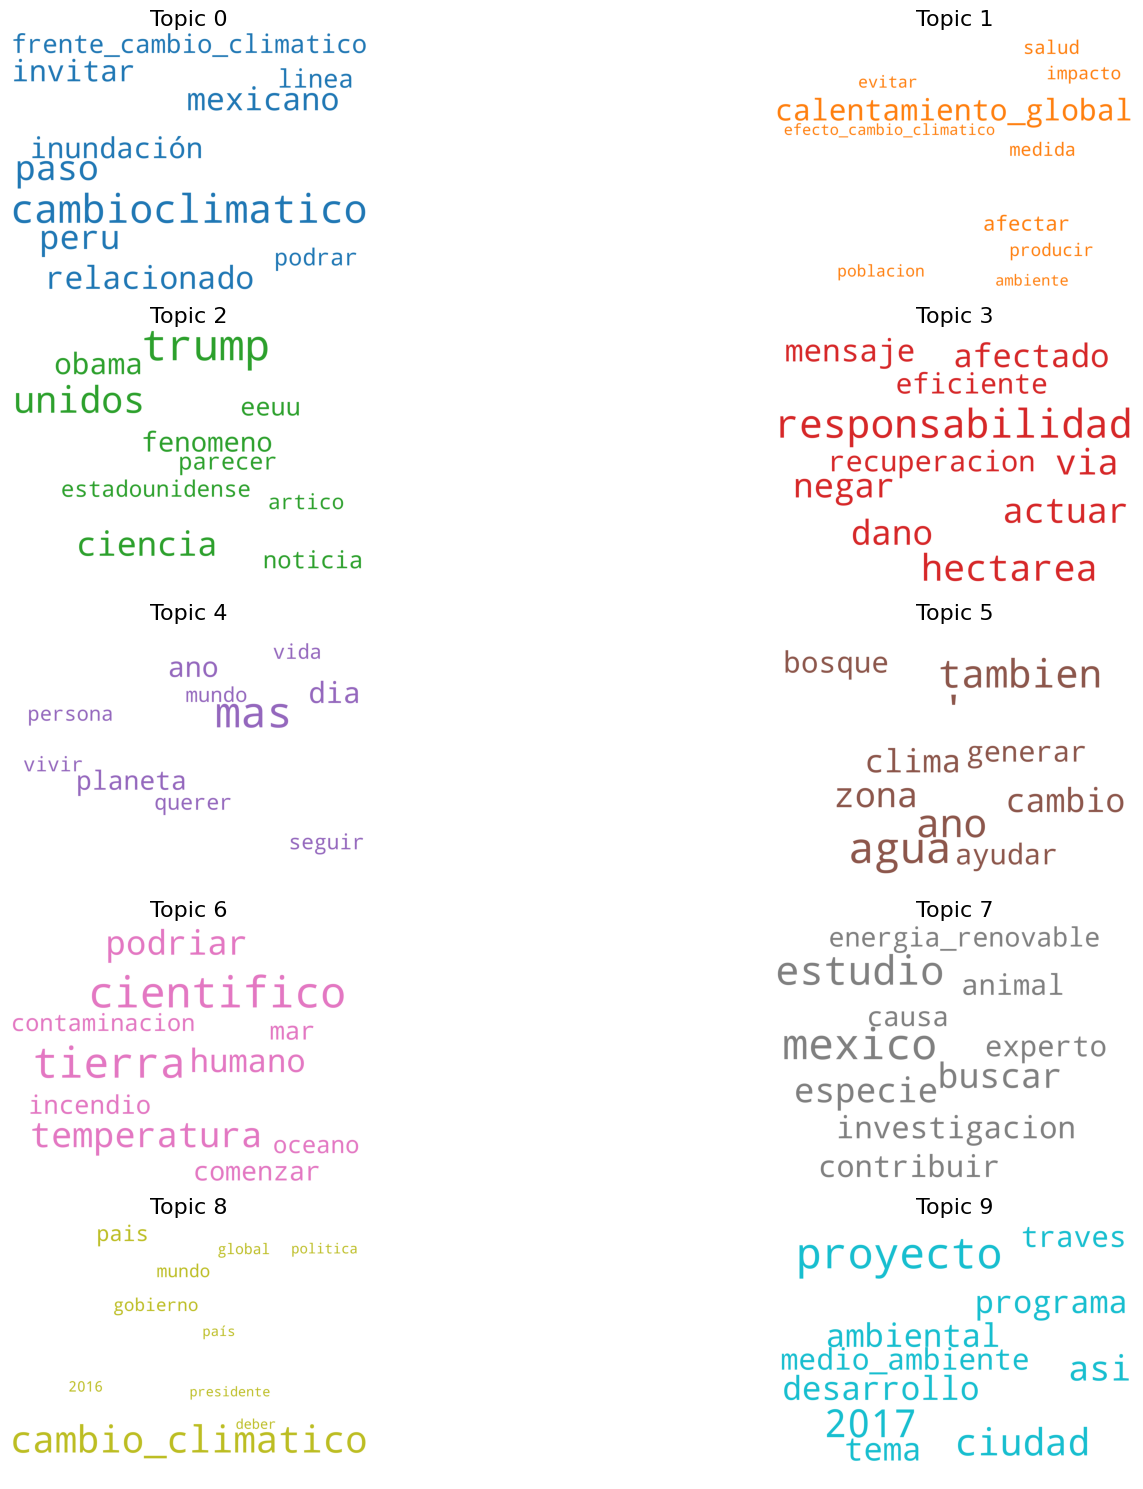

In [46]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(20,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Fuentes
- [Video intuitivo explicación LDA](https://www.youtube.com/watch?v=T05t-SqKArY)
- [Distribución Dirichlet](https://es.wikipedia.org/wiki/Archivo:LogDirichletDensity-alpha_0.3_to_alpha_2.0.gif)